# Wrangle and Analyze Data : Udacity DAND Project 

> ## By Anshul Rampal

## Gathering Data 

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy
import json
%matplotlib inline

In [13]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
images.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Query Twitter API for each tweet in the Twitter archive (Authentication)

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [21]:
# List where we will store the dictionaries and exceptions
df_list = []
exceptions = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the tweets in archive dataframe 
for tweet_id in df_archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'time': pd.to_datetime(date_time)})
    
    # Catch exceptions of TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
847978865427394560 _ Failed to send request: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No 

In [497]:
# Length of List and Length of errors
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2340
The lengh of the errors 16


From the above results:

We reached the limit of the tweepy API twice. We got 2340 records. 

In [498]:
df_list

[{'tweet_id': 892420643555336193,
  'favorites': 38121,
  'retweets': 8333,
  'user_followers': 7541417,
  'user_favourites': 140561,
  'date_time': Timestamp('2017-08-01 16:23:56')},
 {'tweet_id': 892177421306343426,
  'favorites': 32706,
  'retweets': 6158,
  'user_followers': 7541417,
  'user_favourites': 140561,
  'date_time': Timestamp('2017-08-01 00:17:27')},
 {'tweet_id': 891815181378084864,
  'favorites': 24615,
  'retweets': 4076,
  'user_followers': 7541417,
  'user_favourites': 140561,
  'date_time': Timestamp('2017-07-31 00:18:03')},
 {'tweet_id': 891689557279858688,
  'favorites': 41473,
  'retweets': 8479,
  'user_followers': 7541417,
  'user_favourites': 140561,
  'date_time': Timestamp('2017-07-30 15:58:51')},
 {'tweet_id': 891327558926688256,
  'favorites': 39640,
  'retweets': 9169,
  'user_followers': 7541417,
  'user_favourites': 140561,
  'date_time': Timestamp('2017-07-29 16:00:24')},
 {'tweet_id': 891087950875897856,
  'favorites': 19909,
  'retweets': 3055,
  'u

In [499]:
tweet_json=pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

In [500]:
tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [501]:
tweet_json=pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [502]:
tweet_json.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38121,8333,7541417,140561,2017-08-01 16:23:56
1,892177421306343426,32706,6158,7541417,140561,2017-08-01 00:17:27
2,891815181378084864,24615,4076,7541417,140561,2017-07-31 00:18:03
3,891689557279858688,41473,8479,7541417,140561,2017-07-30 15:58:51
4,891327558926688256,39640,9169,7541417,140561,2017-07-29 16:00:24


In [503]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
df_images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

In [504]:
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [939]:
df_archive = pd.read_csv("/Users/anshulrampal/Downloads/twitter-archive-enhanced.csv")
df_archive.set_index("tweet_id", inplace = True)


In [507]:
df_archive.head(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Gathering Data Summary Points:

During Data Wrangling process, data gathering/data acquisition is always the first step. We gathered our data from different sources. The process included :

> Getting data from WeRateDogs Twitter archive (twitter-archive-enhanced.csv) which was manually downloaded. We read the data from this csv file using pandas.

> Downloading a file programmatically using Python Requests library  (image-predictions.tsv).

> Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data stored in a line.

# Assessing Data 

After gathering each of the above pieces of data, we now assess them visually and programmatically for quality and tidiness issues. All these observations will be included in the final report.


### Assess Archive Dataset

In [940]:
df_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [941]:
df_archive.shape

(2356, 16)

In [942]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [943]:
df_archive.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [944]:
# Check for Missing values

df_archive.isnull().sum()

in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [945]:
df_archive.loc[df_archive['rating_denominator'] == 0]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [946]:
# Check for duplicate records

df_archive.duplicated().sum()

0

In [947]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [948]:
df_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [949]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [950]:
df_archive.name.value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
Oliver        11 
Lola          10 
Tucker        10 
Penny         10 
Bo            9  
Winston       9  
Sadie         8  
the           8  
Buddy         7  
an            7  
Bailey        7  
Toby          7  
Daisy         7  
Scout         6  
Stanley       6  
Oscar         6  
Dave          6  
Rusty         6  
Bella         6  
Koda          6  
             ..  
Puff          1  
Brandonald    1  
Tater         1  
Bert          1  
Eevee         1  
his           1  
Karll         1  
Aja           1  
Batdog        1  
Cuddles       1  
Dex           1  
Steve         1  
Blu           1  
Tayzie        1  
Link          1  
Jersey        1  
Tino          1  
Trigger       1  
Buddah        1  
Jerome        1  
River         1  
Brooks        1  
Carbon        1  
Zooey         1  
Beemo         1  
Name: name, Length: 957, dtype: int64

### Assess Image Dataset

In [951]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [952]:
df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [953]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [954]:
# Missing values
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [955]:
# Duplicate Records
df_images.duplicated().sum()

0

In [956]:
df_images.jpg_url.value_counts()

https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                       

In [957]:
df_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
Staffordshire_bullterrier    20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Maltese_dog                  18 
Shetland_sheepdog            18 
beagle                       18 
teddy                        18 
Eskimo_dog                   18 
                             .. 
espresso                     1  
grille                       1  
washer                       1  
earthstar                    1  
American_b

In [958]:
df_images.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Pembroke                          27 
collie                            27 
Eskimo_dog                        27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
miniature_pinscher                20 
Samoyed                           20 
toy_terrier                       20 
chow                              20 
malinois                          20 
Boston_bull                       19 
                                  .. 
breakwater  

In [959]:
df_images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
                                  ..
binder                            1 
b

In [960]:
df_images.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [961]:
df_images.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [962]:
df_images.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [963]:
df_images.img_num.value_counts()


1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

### Assess Twitter API tweet_json

In [964]:
tweet_json.head(20)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38121,8333,7541417,140561,2017-08-01 16:23:56
1,892177421306343426,32706,6158,7541417,140561,2017-08-01 00:17:27
2,891815181378084864,24615,4076,7541417,140561,2017-07-31 00:18:03
3,891689557279858688,41473,8479,7541417,140561,2017-07-30 15:58:51
4,891327558926688256,39640,9169,7541417,140561,2017-07-29 16:00:24
5,891087950875897856,19909,3055,7541417,140561,2017-07-29 00:08:17
6,890971913173991426,11635,2026,7541417,140561,2017-07-28 16:27:12
7,890729181411237888,64306,18502,7541417,140561,2017-07-28 00:22:40
8,890609185150312448,27349,4193,7541417,140561,2017-07-27 16:25:51
9,890240255349198849,31378,7236,7541417,140561,2017-07-26 15:59:51


In [965]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id           2340 non-null int64
favorites          2340 non-null int64
retweets           2340 non-null int64
user_followers     2340 non-null int64
user_favourites    2340 non-null int64
date_time          2340 non-null object
dtypes: int64(5), object(1)
memory usage: 109.8+ KB


In [966]:
tweet_json.columns

Index(['tweet_id', 'favorites', 'retweets', 'user_followers',
       'user_favourites', 'date_time'],
      dtype='object')

In [967]:
tweet_json.shape

(2340, 6)

### ASSESSING DATA SUMMARY

> We assessed data for quality and tidiness issues. Before visualising and getting insights from all the dataset we are using, data clearning is an important step which needs to be performed for getting accurate insights.
> Next step after assesssing the data is to clean the data which is done in the next section.

### Quality and Tidiness issues

#### Quality Issues with Datasets:

1. While fetching the data using the Twitter API, some tweet_id's did throw error. That means we cannot guarantee the consistency of the data fetched from the API with the archive dataset that we have. We need to clean the data to maintain consistency across all the datasets corresponding to a particular tweet id.

2. date_time columns of tweet_json dataframe should be of datetime type.

3. Denominator value(rating_denominator) of archive file privided (df_archive.rating_denominator) has 0 as value which is incorrect. Denominator value cannot be 0. Although, we may have 0 rating value i.e. 0 numerator in case of rare cases.

4. Name column of archive dataset contains invalid names. For instance, 'a','an','None' values are present in name column. Surprisingly, 55 names were 'a' and 745 names were None.

5. Several columns have null values but the value is not null. Ex. None and not NAN.

6. We need only those records i.e. tweets where we have images. In other words, we require original ratings and no retweets.

7. We got less data from image dataset in comparison to the archive dataset that was downloaded manually. We got only 2075 records from the image file that was programatically downloaded whereas we had 2356 records from archive dataset.

8. From source column, extracting the correct source information from the URL's which is visually appealing and easy for interpretation and visualisation.

9. We need to reset the index for archive dataset (df_archive) so that we get tweet_id as a column.


#### Tidiness Issues with Datasets:

1. The three datasets need to be merged together so we can gain interesting insights from the data. No need of seperate datasets.

2. Delete any of the timestamp column from the merged dataset as there is redundant timestamp data which will be present.

3. Adding a gender column from the text column (df_archive dataset).

4. Extraneous columns need to be dropped like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id.

## DATA CLEANING

In [1039]:
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [1040]:
df_archive.reset_index(inplace=True)

In [1041]:
df_images.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [1042]:
tweet_json.head(1)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38121,8333,7541417,140561,2017-08-01 16:23:56


#### Define

Merge the three columns into one column as done below:

#### Code

In [1043]:
# Creating one dataframe from the three datasets using merge operation

df_final = pd.merge(df_archive, df_images, how = 'left', on = ['tweet_id'] )
df_final = pd.merge(df_final, tweet_json, how = 'left', on = ['tweet_id'])
df_final.to_csv('df_final.csv', encoding = 'utf-8')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 34 columns):
index                         2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         235

#### Test

Test the above changes:

In [1044]:
# We get a new dataframe with 33 columnns from all the three datasets which we provided as a part of this merge operation.
df_final.head()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,0.085851,False,banana,0.076110,False,38121.0,8333.0,7541417.0,140561.0,2017-08-01 16:23:56
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,...,0.090647,True,papillon,0.068957,True,32706.0,6158.0,7541417.0,140561.0,2017-08-01 00:17:27
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,...,0.078253,True,kelpie,0.031379,True,24615.0,4076.0,7541417.0,140561.0,2017-07-31 00:18:03
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,...,0.168086,True,spatula,0.040836,False,41473.0,8479.0,7541417.0,140561.0,2017-07-30 15:58:51
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,...,0.225770,True,German_short-haired_pointer,0.175219,True,39640.0,9169.0,7541417.0,140561.0,2017-07-29 16:00:24


In [1045]:
df_final.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorites', 'retweets', 'user_followers', 'user_favourites',
       'date_time'],
      dtype='object')

In [1046]:
# Create a copy of this dataset to retain the original merged dataset in case we need to revert back
# This is required in order to not losing the original version.
df_final_data=df_final.copy()

In [1047]:
# df_final_data dataframe is the dataset that we will be working on as a part of this process. Let's check if we did the copy function accuractely and if the dataset df_final_data has been created or not.

df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 34 columns):
index                         2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         235

#### Define:

Convert timestamp column to timestamp format.

#### Code:

In [1048]:
# Convert timestamp to datetime type
df_final_data['timestamp'] = pd.to_datetime(df_final_data['timestamp'])

#### Test:

In [1049]:
df_final_data.head(1)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,0.085851,False,banana,0.07611,False,38121.0,8333.0,7541417.0,140561.0,2017-08-01 16:23:56


#### Define

Display full length of the columns (i.e for text)

#### Code

In [1050]:
# Using Set_option from Jupyter Notebook. 
pd.set_option('display.max_colwidth', -1)

#### Test

In [1051]:
df_final_data.head(1)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,0.085851,False,banana,0.07611,False,38121.0,8333.0,7541417.0,140561.0,2017-08-01 16:23:56


#### Define

Delete the record where rating_denominator was zero.

In [1052]:
df_final_data.loc[df_final_data['rating_denominator'] == 0]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
313,313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2199.0,78.0,7541435.0,140561.0,2017-02-24 21:54:03


#### Code / Test

*Seems like this record where denominator was zero (from the original dataset) was dropped midway after the cleaning process. So, we don't have to make any such changes.*

In [1053]:
# Check if it was present after the merge operation. 
df_final.loc[df_final['rating_denominator'] == 0]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,date_time
313,313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2199.0,78.0,7541435.0,140561.0,2017-02-24 21:54:03


Seems like this record deleted after the merging process which is a good way to assume that this record is ambiguous and is not required for analysis.

#### Define:

Check if there is any null value present in the tweet id section of the dataset after merge is carried out.

#### Code: 

In [1054]:
# After merging the dataset into one set, verify for consistency of the tweet_id's.
df_final_data.tweet_id.isnull().values.any()

False

#### Test:

In [1055]:
# No nulls are present for the tweet id which is the unique column of the dataset.
# Every record has a corresponding tweet_id

df_final_data.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
               ...        
2331    666353288456101888
2332    666345417576210432
2333    666337882303524864
2334    666293911632134144
2335    666287406224695296
2336    666273097616637952
2337    666268910803644416
2338    666104133288665088
2339    666102155909144576
2340    666099513787052032
2341    666094000022159362
2

#### Define:

Records Removal with no images.

#### Code:

In [1056]:
# Removing records where we do not have jpg_url
df_final_data = df_final_data[pd.notnull(df_final_data['jpg_url'])]

#### Test:

In [1057]:
df_final_data.shape

(2075, 34)

#### Define: 

Removing retweets present in the dataset

#### Code:

In [1058]:
# Removing retweets
df_final_data = df_final_data[pd.isnull(df_final_data['retweeted_status_id'])]

#### Test :

In [1059]:
df_final_data.shape

(1994, 34)

In [1060]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 34 columns):
index                         1994 non-null int64
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1

#### Define :

Source column needs to be polished. We will just retain the main information inside the < a > tags

#### Code :

In [1061]:
df_final_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [1062]:
# Removing a href link and providing only necessary information
df_final_data['source'] = df_final_data.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

#### Test :

In [1063]:
df_final_data.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

#### Define:

Dropping the extraneous columns which are  not required

#### Code:

In [1064]:
# Check for Null values
df_final_data.isnull().sum()

index                         0   
tweet_id                      0   
in_reply_to_status_id         1971
in_reply_to_user_id           1971
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog              

In [1065]:
# Dropping for Archive Datasets
# Columns not required 
df_final_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test for Archive Dataset:

In [1066]:
df_final_data.isnull().sum()

index                 0
tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorites             2
retweets              2
user_followers        2
user_favourites       2
date_time             2
dtype: int64

#### Define

Dropping column date_time which is redundant to timestamp column

#### Code

In [1067]:
# Dropping column date_time
df_final_data.drop(['date_time'], axis=1, inplace=True)

#### Test

In [1068]:
# The redundant column must be dropped
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 28 columns):
index                 1994 non-null int64
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994

#### Define:

Converting Null values to 0 for favorites,retweets,user_followers,user_favourites.

#### Code:

In [1069]:
null_columns=df_final_data.columns[df_final_data.isnull().any()]

In [1070]:
null_columns

Index(['favorites', 'retweets', 'user_followers', 'user_favourites'], dtype='object')

In [1071]:
df_final_data[null_columns].isnull().sum()

favorites          2
retweets           2
user_followers     2
user_favourites    2
dtype: int64

In [1072]:
df_final_data[df_final_data.isnull().any(axis=1)][null_columns].head()

,favorites,retweets,user_followers,user_favourites
932,NaN,NaN,NaN,NaN
953,NaN,NaN,NaN,NaN


In [1073]:
# Filling values with 0 
df_final_data = df_final_data.fillna(0)

#### Test

In [1074]:
df_final_data[null_columns].isnull().sum()

favorites          0
retweets           0
user_followers     0
user_favourites    0
dtype: int64

#### Define

Check for dupliates if present after the merge operation. Delete the records in case duplicates are found.

#### Code

In [1075]:
df_final_data.duplicated().sum()

0

In [1076]:
# Removing duplicates from the merged dataset in case present

df_final_data.drop_duplicates(inplace=True)

#### Test 

In [1077]:
df_final_data.duplicated().sum()

0

In [1078]:
df_final_data.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [1079]:
df_final_data.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### Define

Generate a new column dog_gender from the available text.

#### Code:

In [1080]:
#Creating column dog gender and fetching gender from the text
male = ['He', "He's",'boy', 'he', 'him', 'his', "he's", 'himself']
female = ['She', "She's", 'girl','she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_final_data['text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append('NaN')

In [1081]:
# Check Length of Dog_Gender Column
len(dog_gender)

1994

In [1082]:
df_final_data['dog_gender'] = dog_gender

#### Test :

In [1083]:
print("dog_gender count \n", df_final_data.dog_gender.value_counts())

dog_gender count 
 male      993
NaN       675
female    326
Name: dog_gender, dtype: int64


#### Define 

Checking for name inconsistency in the name column of the dataframe. Removing all such names.

#### Code

In [1084]:
# Check final data
df_final_data

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,dog_gender
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,...,0.085851,False,banana,0.076110,False,38121.0,8333.0,7541417.0,140561.0,male
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,...,0.090647,True,papillon,0.068957,True,32706.0,6158.0,7541417.0,140561.0,female
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,...,0.078253,True,kelpie,0.031379,True,24615.0,4076.0,7541417.0,140561.0,male
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,...,0.168086,True,spatula,0.040836,False,41473.0,8479.0,7541417.0,140561.0,female
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,39640.0,9169.0,7541417.0,140561.0,male
5,5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,...,0.116317,True,Indian_elephant,0.076902,False,19909.0,3055.0,7541417.0,140561.0,NaN
6,6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,...,0.199287,True,ice_lolly,0.193548,False,11635.0,2026.0,7541417.0,140561.0,male
7,7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,...,0.178406,True,Pembroke,0.076507,True,64306.0,18502.0,7541417.0,140561.0,male
8,8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,27349.0,4193.0,7541417.0,140561.0,female
9,9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status

Resetting the index values

In [1085]:
df_final_data.reset_index(inplace=True)

Checking the final dataframe again

In [1086]:
df_final_data

,level_0,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,dog_gender
0,0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,0.085851,False,banana,0.076110,False,38121.0,8333.0,7541417.0,140561.0,male
1,1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,32706.0,6158.0,7541417.0,140561.0,female
2,2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,24615.0,4076.0,7541417.0,140561.0,male
3,3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,0.168086,True,spatula,0.040836,False,41473.0,8479.0,7541417.0,140561.0,female
4,4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,39640.0,9169.0,7541417.0,140561.0,male
5,5,5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,...,0.116317,True,Indian_elephant,0.076902,False,19909.0,3055.0,7541417.0,140561.0,NaN
6,6,6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,...,0.199287,True,ice_lolly,0.193548,False,11635.0,2026.0,7541417.0,140561.0,male
7,7,7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,...,0.178406,True,Pembroke,0.076507,True,64306.0,18502.0,7541417.0,140561.0,male
8,8,8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,27349.0,4193.0,7541417.0,140561.0,female
9,9,9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/pho

Dropping extra column index

In [1087]:
df_final_data.drop(['index'], axis=1, inplace=True)

In [1088]:
# Check names using value_counts
df_final_data.name.value_counts()

None       546
a          55 
Charlie    11 
Lucy       10 
Oliver     10 
Cooper     10 
Penny      9  
Tucker     9  
Sadie      8  
Winston    8  
the        7  
Lola       7  
Toby       7  
Daisy      7  
Stanley    6  
Bella      6  
Jax        6  
an         6  
Bo         6  
Koda       6  
Rusty      5  
Milo       5  
Buddy      5  
Louis      5  
Leo        5  
          ..  
Brooks     1  
Wesley     1  
River      1  
Kirk       1  
Ronnie     1  
Pippin     1  
Carper     1  
O          1  
Kody       1  
Tater      1  
Eevee      1  
his        1  
Karll      1  
Aja        1  
Batdog     1  
Cuddles    1  
Dex        1  
Steve      1  
Blu        1  
Tayzie     1  
Jersey     1  
Tino       1  
Trigger    1  
Jerome     1  
Beemo      1  
Name: name, Length: 936, dtype: int64

Create df_final_data2 to remove all such names as mentioned above.

In [1089]:
df_final_data2=df_final_data.copy()

In [1090]:
#Using series operations from now onwards. Creating df_name which consists of series of names
df_name=df_final_data2.name

In [1091]:
# Checking the shape of the series object
df_name.shape

(1994,)

In [1092]:
# Checking lower value names as these needs to be removed
df_name[df_name.str.islower()].value_counts()

a               55
the             7 
an              6 
one             4 
very            4 
quite           3 
just            3 
getting         2 
space           1 
not             1 
my              1 
infuriating     1 
incredibly      1 
actually        1 
such            1 
light           1 
unacceptable    1 
his             1 
this            1 
all             1 
officially      1 
by              1 
Name: name, dtype: int64

In [1093]:
list_name=['a','this','the','light','actually','infuriating','all','incredibly','officially','by','incredibly','actually','an','one','very','very','quite','just','getting','space','not','my','his','unacceptable','such']

In [1094]:
df_name=df_name.replace(to_replace=list_name, value=None, method='pad')

In [1095]:
df_name[df_name.str.islower()].value_counts()

Series([], Name: name, dtype: int64)

In [1096]:
df_final_data2.name=df_name

In [1097]:
df_final_data2.name.value_counts()

None          584
Oliver        12 
Charlie       11 
Lucy          10 
Cooper        10 
Penny         9  
Tucker        9  
Daisy         8  
Winston       8  
Sadie         8  
Toby          7  
Stanley       7  
Lola          7  
Louis         6  
Jax           6  
Bella         6  
Koda          6  
Bo            6  
Dave          5  
Gary          5  
Rusty         5  
Chester       5  
Milo          5  
Bailey        5  
Leo           5  
             ..  
Tiger         1  
Brandonald    1  
Betty         1  
Meatball      1  
Gert          1  
Aja           1  
Batdog        1  
Cuddles       1  
Dex           1  
Steve         1  
Blu           1  
Tayzie        1  
Jersey        1  
Tino          1  
Trigger       1  
Jerome        1  
River         1  
Brooks        1  
Carbon        1  
Zooey         1  
Harper        1  
Link          1  
Mac           1  
Puff          1  
Beemo         1  
Name: name, Length: 914, dtype: int64

In [1098]:
df_final_data2[df_final_data2.name.str.islower()][['tweet_id','text','name']]

,tweet_id,text,name


In [1099]:
df_final_data[df_final_data.name.str.islower()][['tweet_id','text','name']]

,tweet_id,text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
49,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
135,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
149,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
275,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
404,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
472,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
582,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
596,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very
622,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my


#### Test

Checking records df_final_data with df_final_data2

In [1100]:
df_final_data.name[1985:1994]

1985    a   
1986    a   
1987    an  
1988    a   
1989    None
1990    a   
1991    a   
1992    a   
1993    None
Name: name, dtype: object

In [1101]:
df_final_data2.name[1985:1994]

1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
1992    None
1993    None
Name: name, dtype: object

In [1102]:
df_final_data2.name.value_counts()

None          584
Oliver        12 
Charlie       11 
Lucy          10 
Cooper        10 
Penny         9  
Tucker        9  
Daisy         8  
Winston       8  
Sadie         8  
Toby          7  
Stanley       7  
Lola          7  
Louis         6  
Jax           6  
Bella         6  
Koda          6  
Bo            6  
Dave          5  
Gary          5  
Rusty         5  
Chester       5  
Milo          5  
Bailey        5  
Leo           5  
             ..  
Tiger         1  
Brandonald    1  
Betty         1  
Meatball      1  
Gert          1  
Aja           1  
Batdog        1  
Cuddles       1  
Dex           1  
Steve         1  
Blu           1  
Tayzie        1  
Jersey        1  
Tino          1  
Trigger       1  
Jerome        1  
River         1  
Brooks        1  
Carbon        1  
Zooey         1  
Harper        1  
Link          1  
Mac           1  
Puff          1  
Beemo         1  
Name: name, Length: 914, dtype: int64

All records with a,an and so on have been removed from our dataset.

#### Converting and saving Dataframe df_final_data to csv file.

In [1103]:
df_final_data2.to_csv('/Users/anshulrampal/Downloads/twitter_archive_master.csv', encoding = 'utf-8',index=False)

## Analysis / Visualisation

In [1104]:
df_analysis = pd.read_csv('/Users/anshulrampal/Downloads/twitter_archive_master.csv')
df_analysis['timestamp'] = pd.to_datetime(df_analysis['timestamp'])
df_analysis.set_index('timestamp', inplace=True)

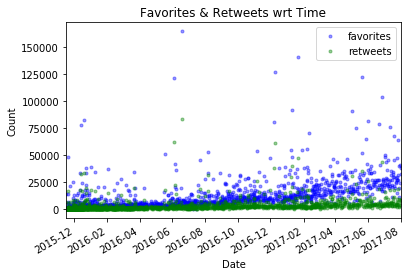

In [1105]:
df_analysis[['favorites', 'retweets']].plot(style = '.', alpha = 0.4,color=['blue','green'])
plt.title('Favorites & Retweets wrt Time')
plt.xlabel('Date')
plt.ylabel('Count');

As can be observe from the diagram that the number of favorites and retweets were increased with time.

In [1106]:
df_analysis.loc[:,['favorites','retweets']].describe()

,favorites,retweets
count,1994.000000,1994.000000
mean,8744.323972,2657.697593
std,12823.484178,4736.646102
min,0.000000,0.000000
25%,1877.250000,591.500000
50%,3940.500000,1273.500000
75%,10912.500000,3046.000000
max,164586.000000,83834.000000


The minimum number of retweets and favourites were assigned by us i.e. 0 for 2 of the records above. Also, we can see that on an average 8744 times the the tweet was liked and 2657 times it was retweet. Also max retweets for any tweet was 83834.

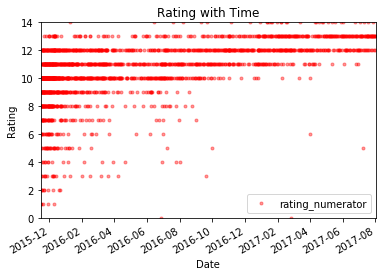

In [1107]:
df_analysis.plot(y ='rating_numerator', ylim=[0,14], style = '.', alpha = 0.4, color='red')
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

The above plot exactly tells what we observed from the prior information avaiable. The dog ratings are more than 10 for most of the tweets. 

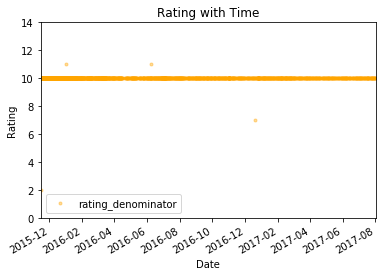

In [1108]:
df_analysis.plot(y ='rating_denominator', ylim=[0,14], style = '.', alpha = 0.4,color='orange')
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

This plot explains the denominator rating which is consistent 10. Somewhere there are 11 or 7 as the denominator but that doesn't effect the analysis since largely the ratings are out of 10

In [1109]:
df_analysis[['favorites', 'rating_numerator', 'retweets']].corr(method='pearson')

,favorites,rating_numerator,retweets
favorites,1.000000,0.015884,0.929647
rating_numerator,0.015884,1.000000,0.018127
retweets,0.929647,0.018127,1.000000


As we can observe from the visualisations, there are many dogs (a lot of them !)  who got more than 10 rating. Yet this is strange since normally rating needs to be withing the provided denominator range. 

We can check if the dogs who got higher scores/rating, are they getting retweets or favourites too. And when we checked and analysed the same, we found that this generally doesn't hold true for most of the dogs. Getting more rating doesn't guarantee the dogs were retweeted or were liked (favorites). 

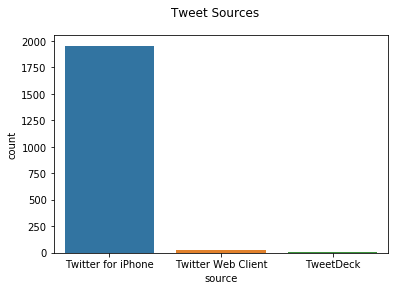

In [1110]:
p = sns.countplot(data=df_analysis, x='source')
p.figure.suptitle('Tweet Sources');


Twitter for iPhone was used mostly while tweeting as we can observe from the visualisation.

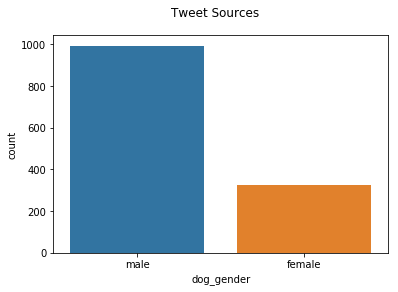

In [1111]:
p = sns.countplot(data=df_analysis, x='dog_gender')
p.figure.suptitle('Tweet Sources');

More Male Gender Dogs are there in comparison with female gender dogs.